In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Loss_Function
---
랜덤으로 정해지는 W. 따라서 Loss를 최소화하는 W를 찾아야 한다.

Loss는 모델에 의한 예측 이미지 라벨과 실제이미지의 라벨이 일치하는 정도를 의미한다. 

전체 데이터셋의 Loss는 다음과 같이 표현할 수 있다. 

## $L = 1/N\sum_{i}^{N}L_{i}(f(x_{i},W),y_{i})$

$f(x_{i},W)$ 는 모델에 의해 예측된 이미지 라벨, $y_{i}$는 실제 라벨을 말한다. Loss를 모두 합쳐 나누면, 전체 데이터셋의 Loss를 구할 수 있다. 

Loss를 측정하는 방법으로 두가지를 소개합니다


## 1) SVM_LOSS

&nbsp;
&nbsp;
&nbsp;

- SVM Loss란?

$L_{i} = \sum_{j \not\equiv y_{i}}max(0,s_{j}-s_{y_{i}}+1)$

true score 즉 $s_{y_{i}}$ 가 다른 $s_{j}$와 비교했을때 safety margin보다 높으면
Loss가 떨어지고 낮으면 Loss가 생김. 

예를 들어 첫번째 고양이 사진을 봤을 때, car가 5.2로 score가 가장 높다. 따라서 car와 cat사이에 1.9 + 1 = 2.9 의 loss가 생긴다.

근사한 차이의 경우 잘못 분류할 수 있으므로 safety margin을 설정하여 더 큰 차이로 분류를 해냈을때 성공(Loss = 0)으로 정의한다. safety margin은 반드시 1일 필요는 없다

&nbsp;
&nbsp;
&nbsp;

![](https://user-images.githubusercontent.com/36406676/52391717-12ece000-2ae2-11e9-8789-057790ae606b.PNG)







&nbsp;
&nbsp;
&nbsp;

- __Q&A 를 통한 SVM Loss이해하기__




Q1.  __Loss의 최솟값, 최댓값은 무엇인가?__

A1. 최솟값은 0이며, 최댓값은 Infinity



Q2. __만약 상단 Car점수가 조금 올라간다면 Loss에는 차이가 있는가?__

A2. Car점수가 가장 높기 때문에 Loss에는 차이가 없다.



Q3. __각 라벨별 score가 0에 가까운 수이면 loss의 값은(safety margin이 1)?__

A3. Number of classes -1 ($s_{j} - s_{y_{i}}$가 0이므로)


Q4. __loss값을 구하는데 모든 class를 다 더하면 (Including j = y_i)?__


A4. safety margin 만큼 loss가 커진다


Q5. __Loss 값을 구하는 식에서  mean 대신에 sum을 쓴다면??__


A5. rescaling이라서 둘다 써도 상관없음


Q6. __Loss값을 구하는 식에서 제곱이 들어간다면?__
$L_{i} = \sum_{j \not\equiv y_{i}}max(0,s_{j}-s_{y_{i}}+1)^2$

A6. 제곱을 한다는 것은 Loss의 크기에 따라 가중치가 들어감. 조금 나쁜 것과 나쁜 것의 차이를 크게 하여 Loss의 중요도를 조절.

Q7. __L=0인 Weight가 유일한가?__

A7. 아니다. 2\*W도 L=0이다. 

&nbsp;
&nbsp;
&nbsp;

In [12]:
def SVM_Loss(scores, y, safety_margin=1): 
    """
    scores : w.dot(x)
    y : 라벨
    safety_margin : safety_margin
    """
    margins = np.maximum(0,scores - scores[y] + safety_margin)
    margins[y] = 0
    loss_i = np.sum(margins)
    return loss_i


scores1 = np.array([3.2, 5.1, -1.7])
scores2 =  np.array([1.3, 4.9, 2.0])
scores3 = np.array([2.2, 2.5, -3.1])

y0 = 0
y1 = 1
y2 = 2


print(SVM_Loss(scores1,y0)) # 2.89
print(SVM_Loss(scores2,y1)) # 0
print(SVM_Loss(scores3,y2)) # 12.9

2.8999999999999995
0.0
12.9


![](https://user-images.githubusercontent.com/36406676/52476823-3ba8ce80-2be3-11e9-9bce-a8e1aa5654e9.PNG)

&nbsp;
&nbsp;
&nbsp;

- Regularization : 모델 복잡도에 대한 페널티

$\lambda$ = regularization strength

training_data에 overfitting되는 것을 방지하기 위해서 Regularization을 둔다.

람다가 클수록 모델 복잡도에 대한 중요도를 크게 본다.(__Overfitting 방지__)

람다가 작다면 고차원의 모델을 필요로 하는것 (__Underfitting 방지__)

L1 regression model을 사용하는 regression model을 __Lasso Regression__,

L2 regression model을 사용하는 regression model을 __Ridge Regression__ 이라고 부른다

&nbsp;
&nbsp;
&nbsp;

![](https://user-images.githubusercontent.com/36406676/52479637-a3174c00-2bec-11e9-9c7e-789cf7115746.PNG)

&nbsp;
&nbsp;
&nbsp;

R(W) 가 L2 Regularization이고, x값(이미지픽셀)이 [1,1,1,1]이면 w1[1,0,0,0] 과 w2[0.25,0.25,0.25,0.25] 가 각각 가중치라고 했을때 dot product를 하면 1이라는 똑같은 값이 나온다. 

L2 Regularization의 입장에서 봤을때 w1과 w2중 어떤 w값을 더 간결하다고 생각한다면 w2가 더 좋을 것이다. w1의 모든 원소의 제곱보다는 w1의 모든 원소의 곱이 더 작다. 

즉 L2는 w값이 최대한 평평하게 너무 큰 값없이 최대한 비슷한 값으로 이루어지게 하고 싶은 것이다. 

&nbsp;
&nbsp;
&nbsp;

## 2) Softmax

&nbsp;
&nbsp;

Softmax Classifier의 Loss는 다음과 같이 정의된다.

$L_{i} = -log(\frac{e^{s_{y_{i}}}}{\sum_{j}e^{s_{j}}})$


log안에 있는 부분은 제대로 이미지를 분류할 확률이다.

이미지의 라벨을 올바르게 분류했을 경우 log안에 들어있는 부분(확률)은 1에 가까워 
loss는 0이 나온다. 

하지만 log값이 0에 가까워지면 loss는 infinity로 향한다 

&nbsp;
&nbsp;

![](https://user-images.githubusercontent.com/36406676/52392080-b12d7580-2ae3-11e9-88fc-d2cf4ef9f5ff.PNG)

In [13]:
def softmax(a): # 지수함수를 계산할 때 값이 커지면 nan이 계산됨
    c = np.max(a)
    exp_a = np.exp(a-c) # 소프트 맥스의 지수함수를 계산할 떄 어떤 정수를 더해도 결과는 바뀌지 않는다는 점을 이용
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

a = [3.2, 5.1, -1.7]

print(softmax(a)) # 0.12998, 0.869049 0.000967

[0.12998254 0.86904954 0.00096793]


&nbsp;
&nbsp;
&nbsp;

- __Q&A 를 통한 Softmax Loss이해하기__

Q1. __Softmax loss의 min값과 max값은?__

A1. SVM과 똑같다. min값은 0이고 max값은 infinity이다.(unbounded)

Q2. __W가 너무 작아서 score값이 0에 가깝다면 loss값은?__

A2. -log(1/c) = log(c)       # c: class 개수

&nbsp;
&nbsp;
&nbsp;

![](https://user-images.githubusercontent.com/36406676/52392458-3b2a0e00-2ae5-11e9-924a-9d7b243407ba.PNG)

In [14]:
scores4 = np.array([-2.85, 0.86, 0.28])
y4 = 2
print(SVM_Loss(scores4,y4)) 

1.58


In [21]:
def cross_entropy_error(y, t): # t는 라벨
    delta = 1e-7
    return -np.sum(t* np.log(y + delta)) # np.log는 자연로그

t0 = [0,0,1]
cross_entropy_error(softmax(scores4),t0)

1.0401902864545256

![](https://user-images.githubusercontent.com/36406676/52392832-f30beb00-2ae6-11e9-9625-b8bdf1679597.PNG)

&nbsp;
&nbsp;
&nbsp;

- __Q&A 를 통한 Softmax Loss이해하기__

Q3. __score값을 미세하게 조정한다면 Softmax와 SVM에서 loss가 어떻게 바뀔까?__

A3. SVM은 똑같다. SVM에서는 잘 분류하기만 하면 그 크기나 변화는 반영이 안된다. 반면 Softmax에서는 항상 그 값이 갱신된다. (improve, worsen을 항상 반영)

&nbsp;
&nbsp;
&nbsp;

In [19]:
## svm
t0 = 0

print(SVM_Loss(np.array([10,-2,3]),0))
print(SVM_Loss(np.array([10.01,-2,3]),0))

print('-'*50)

## Softmax
t0 = [1,0,0]

print(cross_entropy_error(softmax([10,-2,3]),t0))
print(cross_entropy_error(softmax([10.1,-2,3]),t0)) # 값이 조정된것 확인

0
0.0
--------------------------------------------------
0.0009175049577967678
0.0008302195426778567


&nbsp;
&nbsp;
&nbsp;

- Recap
여태까지 배운 내용들을 정리한것입니다

![](https://user-images.githubusercontent.com/36406676/52481566-31420100-2bf2-11e9-8de5-bbeaac93f31b.PNG)

# 2. Optimization
---

&nbsp;
&nbsp;
&nbsp;

앞에서 배운 loss_function을 최소화하는 과정을 optimization이라고 한다.

산에서 내려오는 상황에 비유한다면 산의 높이는 loss이고 나의 위치는 w이다.
optimization은 loss가 적은 곳으로 w를 변화시키며 내려오는 과정일 것이다.

경사가 높은 쪽으로 이동한다면 빨리 낮은곳에 도착할 수 있습니다. 

&nbsp;
&nbsp;
&nbsp;

![](https://user-images.githubusercontent.com/36406676/52393533-cdccac00-2ae9-11e9-861f-460c4c8dbf85.PNG)

&nbsp;
&nbsp;
&nbsp;

numerical한 방식으로 계산하는것은 느리고 정확하지 않아서 analytic한 방법을 사용할 것이다.(다음장에서)

&nbsp;
&nbsp;
&nbsp;

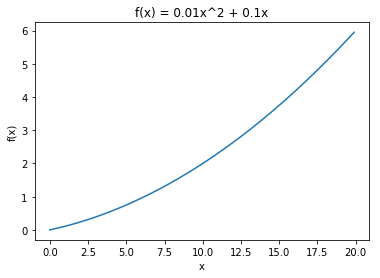

0.1999999999990898
0.2999999999986347


In [17]:
## Numerical_diff
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

def function_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0,20,0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("f(x) = 0.01x^2 + 0.1x")
plt.plot(x,y)
plt.show()

print(numerical_diff(function_1,5)) # 0.199999
print(numerical_diff(function_1,10)) # 0.299999

In [18]:
## Partial_dff 이런식으로 구하면 속도가 굉장히 느리다. 
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val # f(x-h) 계산
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad

def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)

print(numerical_gradient(function_2, np.array([3.0,4.0]))) # 3.00005, 4.00005
print(numerical_gradient(function_2, np.array([0.0,2.0]))) # 4.99999-e5 2.000005

[3.00005 4.00005]
[4.99999997e-05 2.00005000e+00]
